In [142]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import cos, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D

In [143]:
N = 500
K = 500
# R1 = 0.03
# R2 = 2.5
u = 1
d = 0.5
M = 0
df1 = 2 * pi / N
df2 = 2 * pi / K

R1 = np.linspace(0.5, 6, 100)
R1.shape = 100, 1
R2 = np.linspace(0.5, 6, 100)
R2.shape = 1, 100


In [144]:
for n in range(N):
    for k in range(K):
        M += cos(k * df2 - n * df1) / (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(n * df1 - k * df2) + d ** 2)
M *= u * R1 * R2 / (4 * pi)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


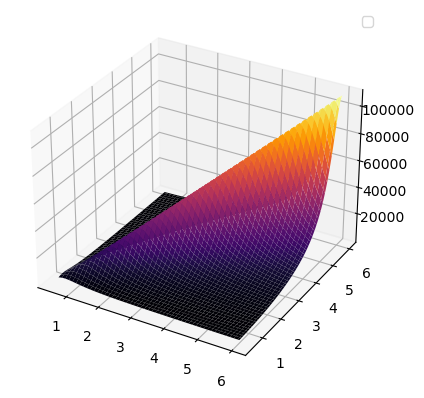

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(R1, R2, M, cmap="inferno")
ax.legend()

In [77]:
R1.shape

(50,)

In [92]:
R2 = np.array(R2)

In [93]:
R2.shape

(50,)